In [2]:
import numpy as np
import pandas as pd
from reco_systems.filter import filter_df
from reco_systems.user_game_matrix import *
from reco_systems.CF_knn import *
import seaborn as sns
from reco_systems.evaluation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
users50cos = np.array([[2.36458367, 3.74540641, 2.30611876, 4.46216554, 3.87001244,
        2.74757   , 6.20433723, 2.57852405, 4.95695195, 2.57750646,
        3.2607788 , 2.60284988, 3.50442874, 6.91611087, 4.17261797,
        2.38993202, 4.77303792, 4.39696901, 6.09612153, 4.05096329,
        3.95202578, 5.49189914, 3.25506149, 3.14551561, 5.92553807,
        2.31438366, 3.13818554, 3.06021446, 5.33360154, 3.28501221,
        3.44102745, 4.7901502 , 3.32280918, 5.41288808, 3.40628719,
        3.29089382, 2.7726172 , 5.47088611, 4.13480271, 4.27958164,
        4.87872162, 3.29409772, 4.14067229, 3.59968443, 2.55699242,
        5.85647602, 3.64807112, 3.95594281, 4.01620503, 4.41290412],
       [2.35173855, 4.10012599, 2.24796115, 3.85220729, 3.70361264,
        2.5562227 , 6.55666876, 2.4379005 , 4.25126004, 2.9837552 ,
        2.72574356, 3.50360526, 7.41657688, 4.13111456, 2.97440187,
        5.04778534, 4.31868709, 5.97895822, 4.55142931, 4.15301078,
        6.26944878, 3.36751866, 2.88834782, 5.42630764, 2.50630593,
        3.00736902, 2.92625522, 4.99948625, 3.19701774, 3.81384511,
        4.83220233, 3.23522463, 5.00010378, 2.88403953, 3.04536157,
        2.64662622, 5.12388741, 4.36278973, 4.11086319, 5.00213857,
        3.20042556, 6.0275551 , 3.99586298, 3.71844286, 2.76268159,
        5.79145597, 4.04136107, 4.58215094, 3.67685446, 3.66636964],
       [2.34218017, 4.2071241 , 2.31816597, 4.05583017, 3.99638777,
        2.7536011 , 5.69689686, 2.42411492, 3.18854379, 4.57141749,
        3.08617096, 2.70364495, 3.4801104 , 6.59714104, 4.09765351,
        2.82878841, 5.1518097 , 4.62596098, 6.00906788, 4.35324115,
        3.92828535, 6.28952896, 3.20684471, 3.63439524, 6.26813091,
        2.36384427, 3.27455818, 3.05892905, 4.89595607, 3.76188195,
        4.60174301, 3.17668593, 4.9255138 , 3.10168987, 3.46766602,
        3.2503902 , 2.97058594, 4.99090928, 4.18286985, 3.97235605,
        4.88764037, 3.57176139, 5.58111449, 3.87298667, 2.68493913,
        5.31003526, 3.67565859, 3.93154641, 3.67059816, 3.69241462],
       [2.33712463, 4.32538464, 2.18261496, 4.29450705, 3.69749564,
        2.43142468, 6.83166204, 2.76084725, 3.59932657, 4.28938255,
        3.08760541, 2.61623864, 3.49216941, 4.40590851, 6.34358242,
        4.17387652, 2.93768702, 5.14444561, 4.16914742, 6.31530704,
        4.09465236, 3.65131485, 6.63533852, 3.16284341, 2.76299723,
        6.1266213 , 2.16164036, 3.4984611 , 2.91894459, 5.55164573,
        3.33447739, 4.67335926, 3.39447881, 5.36856111, 3.07699918,
        3.87449343, 3.2373258 , 2.60946287, 5.36273433, 4.03827491,
        3.85431658, 4.68684279, 3.58122375, 5.02013948, 3.37928573,
        2.5684194 , 5.52616112, 3.73665636, 3.24963151, 4.06559571],
       [2.53406522, 4.23733394, 1.9691569 , 3.97611372, 4.16614905,
        2.550507  , 5.67400836, 2.7138617 , 3.32779538, 4.36934656,
        2.80268355, 2.57475059, 3.1485918 , 4.28590263, 5.88249221,
        4.31396347, 2.69837027, 5.10501828, 4.7568748 , 6.19112823,
        4.21543853, 3.24642921, 5.85530067, 3.43998353, 2.73236119,
        6.7271848 , 2.57326343, 3.5744504 , 3.06591913, 5.2588265 ,
        3.1810637 , 4.85111279, 4.53317277, 3.42758376, 4.86160117,
        3.13840867, 3.97241541, 2.69632871, 5.03508126, 4.010928  ,
        3.64646935, 4.79918405, 4.09901172, 4.90435883, 4.33500781,
        2.66049728, 5.44772534, 4.04138683, 3.53069396, 3.6548995 ],
       [2.44702076, 4.39347938, 1.85819578, 4.24137614, 4.17421812,
        2.62710732, 5.91173339, 2.67590179, 3.86806357, 4.22081618,
        2.9275399 , 2.51174928, 3.39667172, 4.80927219, 6.45718008,
        3.94136425, 2.79433365, 5.0647976 , 4.43158594, 6.33653973,
        4.52894316, 3.68630196, 5.82628624, 2.99495375, 2.99040854,
        6.30987141, 2.37524787, 2.76411259, 3.02034765, 5.17409956,
        3.01931605, 5.02118093, 4.3597893 , 2.70747043, 4.64986049,
        3.20295616, 3.47433705, 2.84238772, 4.95160381, 4.03040084,
        3.71442668, 5.06759509, 3.61806835, 5.19942755, 3.55213429,
        2.63948766, 5.22793725, 3.77270177, 3.50762203, 3.70756367],
       [2.33696638, 4.82759604, 1.97519688, 3.92878603, 4.25058803,
        2.64382136, 6.20390646, 2.59906614, 3.24938473, 4.13251237,
        2.78216379, 2.56970009, 3.49981632, 4.50337861, 7.15623578,
        4.04916289, 2.53384667, 4.86397506, 4.6604916 , 6.1256463 ,
        4.34050349, 4.10238903, 5.66455549, 3.13206275, 3.29253552,
        6.22434028, 2.32026817, 2.91093163, 2.92012924, 4.95453246,
        2.97824376, 4.70655713, 4.49813015, 3.02117729, 5.51365047,
        4.01691853, 3.08666156, 3.96787832, 2.4279956 , 5.18803572,
        3.82478893, 3.98593273, 4.88825527, 3.42833039, 5.35894017,
        3.11742003, 2.47824706, 5.200044  , 3.93047854, 3.4383232 ],
       [2.22933042, 4.3414976 , 2.09307489, 3.96740914, 4.19809203,
        2.46617895, 6.41363184, 2.72642345, 3.10441234, 4.1345552 ,
        2.96493973, 2.34570617, 3.28213126, 4.31001758, 4.42646814,
        2.995227  , 4.70608943, 4.93532324, 6.17062267, 4.82603758,
        3.53299193, 6.16725016, 2.93832904, 3.3263256 , 6.34224732,
        2.20342327, 4.76505162, 2.9244861 , 2.97457995, 4.86096847,
        3.21928353, 4.81484231, 4.5391312 , 3.13975422, 5.36954946,
        3.54132755, 2.98758731, 3.68986102, 2.60302408, 4.64759981,
        4.14582512, 3.38478622, 4.77310482, 3.8579318 , 4.64091607,
        3.41389098, 2.44976384, 5.61158203, 4.1414757 , 3.31787139]])

In [ ]:
#np.save("rmse_data/violin_plot_5iter_means_baseline_cos_50users", users50cos)
l = np.load('rmse_data/violin_plot_5iter_means_baseline_cos_50users')

FileNotFoundError: [Errno 2] No such file or directory: 'rmse_data/violin_plot_5iter_means_baseline_cos_50users'

In [66]:
folder = "database_cleaned"
avis_clean = pd.read_csv(f"database_cleaned/avis_clean.csv", index_col=0)
jeux_clean = pd.read_csv(f"database_cleaned/jeux_clean.csv", index_col=0)
users = pd.read_csv(f"trictrac_database/users.csv", names=["Username", "User id"])

# Baseline cos. RMSE distribution based on `min_reviews`

In [67]:
min_reviews = np.arange(5, 13, 1)
users_games = []
nb_users = 300

In [68]:
vect_rmse = np.vectorize(calc_RMSE_cos, excluded=['matrix_ratings', 'mask_ratings', 'similarity_matrix'])
rmses = []
for lim in min_reviews:
    print(lim)
    rev_filter = filter_df(avis_clean, lim)
    users_games.append((rev_filter["User id"].nunique(), rev_filter["Game id"].nunique()))
    matrix_ratings, mask_ratings, users_table_assoc, games_table_assoc = get_matrix_user_game(rev_filter)
    similarity_matrix, _ = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
    users_count = rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count().sort_values(by="Game id", ascending=False).head(50)
    users = users_table_assoc[users_table_assoc.isin(users_count.index)].index.to_numpy()
    rmses_iter = []
    
    for i in range(5):
        print(i)
        result = vect_rmse(users, matrix_ratings=matrix_ratings, mask_ratings=mask_ratings, similarity_matrix=similarity_matrix)
        rmses_iter.append(result)

    rmses.append(np.array(rmses_iter).mean(axis=0))

5
11201 10549
3242 3957
3006 3910
3003 3910
0
1


KeyboardInterrupt: 

In [69]:
rmses_means = np.array(rmses)
rmses_means

array([], dtype=float64)

/var/folders/dp/qpw35dg90hv8n0247r1klh4c0000gn/T/ipykernel_18706/802133081.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(f"{ug}\n{lim}" for ug, lim in tuple(zip(users_games, min_reviews.astype(int))))


Text(0, 0.5, 'RMSE')

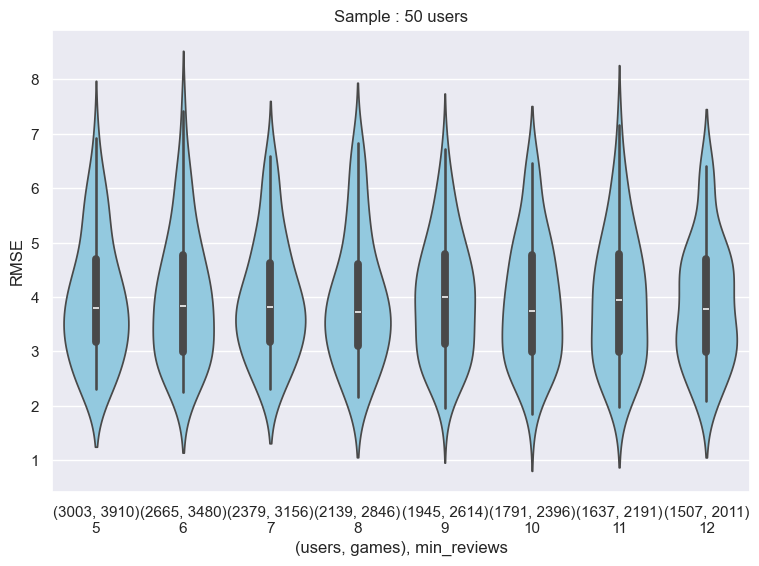

In [ ]:
sns.set_theme(rc={'figure.figsize':(9,6)})

ax = sns.violinplot(list(rmses_means),  color="skyblue")
ax.set_title("Sample : 50 users")
ax.set_xticklabels(f"{ug}\n{lim}" for ug, lim in tuple(zip(users_games, min_reviews.astype(int))))

ax.set_xlabel("(users, games), min_reviews")
ax.set_ylabel("RMSE")

# Baseline euclidean, cos. RMSE distribution comparison
## 25 most active users


In [70]:
min_reviews = 5
rev_filter = filter_df(avis_clean, min_reviews)

11201 10549
3242 3957
3006 3910
3003 3910


In [ ]:
matrix_ratings, mask_ratings, users_table_assoc, games_table_assoc = get_matrix_user_game(rev_filter)
mask_ratings

<Compressed Sparse Row sparse array of dtype 'float64'
	with 113446 stored elements and shape (3003, 3910)>

In [72]:
similarity_matrix_cos, _ = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
similarity_matrix_eucl, mask_sim_eucl = calc_similarity_matrix(matrix_ratings, mask_ratings, "euclidean")

In [81]:
mask_sim_eucl

<Compressed Sparse Row sparse array of dtype 'float64'
	with 2238677 stored elements and shape (3003, 3003)>

In [123]:
users_count = rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count().sort_values(by="Game id", ascending=False).head(25)
users = users_table_assoc[users_table_assoc.isin(users_count.index)].index.to_numpy()
users_count.columns = ["Count reviews"]
users_count

,Count reviews
User id,
208,1337
1,970
83,921
91,764
201,702
1724,654
1936,574
2,470
1998,452


In [82]:
vect_rmse_cos = np.vectorize(calc_RMSE_cos, excluded=['matrix_ratings', 'mask_ratings', 'similarity_matrix'])
rmse_cos = vect_rmse_cos(users, matrix_ratings=matrix_ratings, mask_ratings=mask_ratings, similarity_matrix=similarity_matrix_cos)

In [83]:
vect_rmse_eucl = np.vectorize(calc_RMSE_eucl, excluded=['matrix_ratings', 'mask_ratings', 'similarity_matrix', 'mask_sim_matrix'])
rmse_eucl = vect_rmse_eucl(users, matrix_ratings=matrix_ratings, mask_ratings=mask_ratings, similarity_matrix=similarity_matrix_eucl, mask_sim_matrix=mask_sim_eucl)

In [ ]:
df_rmse_cos = pd.DataFrame(zip(users_table_assoc[users], rmse_cos), columns=["User id", "RMSE"]).merge(users_count, on ="User id").assign(dataset="cos")
df_rmse_eucl = pd.DataFrame(zip(users_table_assoc[users], rmse_eucl), columns=["User id", "RMSE"]).merge(users_count, on ="User id").assign(dataset="eucl")
df_all_rmse = pd.concat([df_rmse_eucl, df_rmse_cos])

Text(0.5, 0.98, 'Baseline cos & eucl')

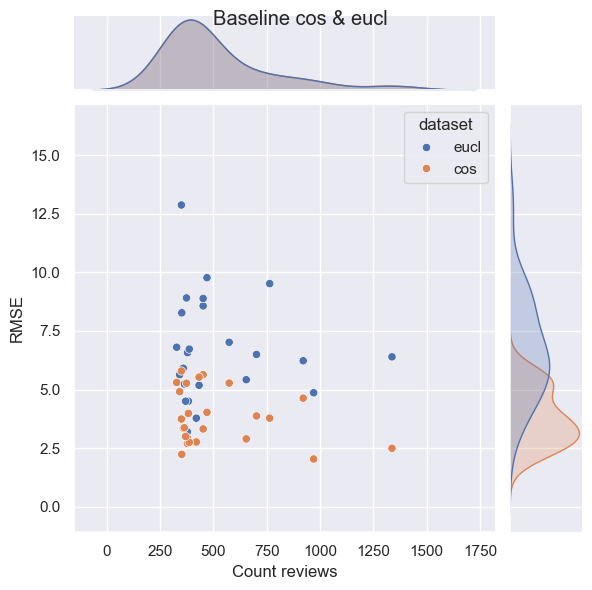

In [ ]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
n_ticks = 5  
ax = sns.jointplot(x='Count reviews', y='RMSE', data=df_all_rmse, hue="dataset")

ax.figure.suptitle("Baseline cos & eucl")
# for ind, label in enumerate(ax.get_xticklabels()):
#     if ind % 10 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)